# Analysis - part 1

In [2]:
#importing the neccesary libraries

import pandas as pd
import geopandas as gpd
import plotly as plt
import folium 
import matplotlib.pyplot as mplt
import contextily as ctx
from shapely import wkt
from shapely.wkt import loads
import plotly.express as px
import osmnx as ox

## Loading data

In [3]:
# Importing EJI file
EJI =gpd.read_file('../../Data/EJIselectdata.geojson')
EJI.head()

state code county code              affgeoid        geoid          county  \
0         06         071  1400000US06071001307  06071001307  San Bernardino   
1         06         071  1400000US06071001703  06071001703  San Bernardino   
2         06         071  1400000US06071001812  06071001812  San Bernardino   
3         06         071  1400000US06071001002  06071001002  San Bernardino   
4         06         071  1400000US06071001310  06071001310  San Bernardino   

                                           location  total population  \
0  Census Tract 13.07, San Bernardino County, Calif              4212   
1  Census Tract 17.03, San Bernardino County, Calif              5680   
2  Census Tract 18.12, San Bernardino County, Calif              3477   
3  Census Tract 10.02, San Bernardino County, Calif              5929   
4  Census Tract 13.10, San Bernardino County, Calif              6193   

   day population  EJI rank  Environmental burden rank  ...  \
0            2345    0.6649                     0.8834  ...   
1            2388    0.4366                     0.6255  ...   
2            2913    0.9054                     0.9883  ...   
3            1960    0.6587                     0.7748  ...   
4            2689    0.7382                     0.9542  ...   

   % households < $75,000  % uninsured  % no internet  % age 65+  \
0                 39.6300         10.6           14.3        9.1   
1                 26.3285          7.0            5.6       13.6   
2                 53.0762         13.0           26.5       11.1   
3                 49.3195         13.9           24.3        6.4   
4                 34.8688          6.4           13.6       12.1   

   % age 17 or younger  % with disability  % limited english  % mobile home  \
0                 26.3                8.9               10.3            0.0   
1                 19.4                7.8                8.1           10.8   
2                 26.0               11.4               18.2            0.0   
3                 30.3                7.2               13.3            0.0   
4                 27.3               10.2               12.5            0.9   

   % group quarters                                           geometry  
0               0.2  POLYGON ((-117.62857 34.09215, -117.62856 34.0...  
1               0.6  POLYGON ((-117.66764 34.03029, -117.66760 34.0...  
2               1.8  POLYGON ((-117.65077 34.04925, -117.65074 34.0...  
3               0.0  POLYGON ((-117.68082 34.07406, -117.68082 34.0...  
4               3.2  POLYGON ((-117.64145 34.08708, -117.64144 34.0...  

[5 rows x 62 columns]

In [4]:
# Importing Land Use file
osm =gpd.read_file('../../Data/ontariolanduse.geojson')
osm.head()

element_type      osmid building                     geometry
0         node  521362425    house  POINT (-117.59008 34.02953)
1         node  521362429    house  POINT (-117.59027 34.02946)
2         node  521362433    house  POINT (-117.59026 34.02885)
3         node  521362436    house  POINT (-117.59004 34.02874)
4         node  521362440    house  POINT (-117.59010 34.02860)

In [5]:
# Importing Warehouse (charts) file
wh_new =pd.read_csv('../../Data/warehousecharts.csv')
wh_new.head()

Unnamed: 0  Acres  Year built  Building sq.ft.
0           0    275        2021          7778022
1           1    225        2003          6381893
2           2    151        2016          4273702
3           4    106        2018          3014158
4           5    106        1941          2990190

In [6]:
# Importing Warehoiuse (maps - Parcel csv) file
Warehouse_Parcel =pd.read_csv('../../Data/warehouseparcelmaps.csv')
Warehouse_Parcel.head()

Unnamed: 0  Assessor parcel number             Building classification  \
0           0                23812175              distribution warehouse   
1           1                21126319  transit warehouse (truck terminal)   
2           2               107311124              distribution warehouse   
3           3                21121315                   storage warehouse   
4           4                23808145              distribution warehouse   

   Year built  Acres  Building sq.ft.  OBJECTID                     OwnerName  \
0        1996     93          2646053    157685  TOYOTA MOTOR SALES U S A INC   
1        1992     70          1986082    123022  UPS WORLDWIDE FORWARDING INC   
2        2021     62          1748594    685625               OLV PHASE II LP   
3        1992     61          1723857    121965  UPS WORLDWIDE FORWARDING INC   
4        1980     59          1681858    157834  COSTCO WHOLESALE CORPORATION   

    LandValue   Improvemen  ...       ZoningDesc       Jurisdicti  \
0  51,510,534   30,864,960  ...  City of Ontario  City of Ontario   
1  25,587,357   54,634,664  ...  City of Ontario  City of Ontario   
2  65,790,000   75,500,000  ...  City of Ontario  City of Ontario   
3  24,185,220   24,451,343  ...  City of Ontario  City of Ontario   
4  76,500,000  147,900,000  ...  City of Ontario  City of Ontario   

                     Jurisdic_1  BaseYear PageMap  \
0  http://www.ci.ontario.ca.us/      1993   23812   
1  http://www.ci.ontario.ca.us/      1992   21126   
2  http://www.ci.ontario.ca.us/      2021  107311   
3  http://www.ci.ontario.ca.us/      1992   21121   
4  http://www.ci.ontario.ca.us/      2021   23808   

                           AssessDesc  AssessClas     Shape__Are   Shape__Len  \
0              DISTRIBUTION WAREHOUSE  COMMERCIAL  552237.437500  3009.581112   
1  TRANSIT WAREHOUSE (TRUCK TERMINAL)  INDUSTRIAL  414508.363281  2895.298085   
2              DISTRIBUTION WAREHOUSE  INDUSTRIAL  364429.617188  2738.202572   
3                   STORAGE WAREHOUSE  COMMERCIAL  359815.906250  2461.426213   
4              DISTRIBUTION WAREHOUSE  INDUSTRIAL  351134.007812  2355.939087   

                                            geometry  
0  POLYGON ((-117.557958732513 34.047990601161, -...  
1  POLYGON ((-117.578957441574 34.0481115516985, ...  
2  POLYGON ((-117.606397404497 33.9903502473197, ...  
3  POLYGON ((-117.583135956016 34.0519451467786, ...  
4  POLYGON ((-117.532885448579 34.0625201898649, ...  

[5 rows x 27 columns]

In [7]:
# Importing Warehouse (maps - Parcel_Geo geojson) file
Warehouse_Parcel_Geo =gpd.read_file('../../Data/warehousemaps.geojson')
Warehouse_Parcel_Geo.head()

Assessor parcel number             Building classification  Year built  \
0              023812175              distribution warehouse        1996   
1              021126319  transit warehouse (truck terminal)        1992   
2              107311124              distribution warehouse        2021   
3              021121315                   storage warehouse        1992   
4              023808145              distribution warehouse        1980   

   Acres  Building sq.ft.  OBJECTID                     OwnerName   LandValue  \
0     93          2646053    157685  TOYOTA MOTOR SALES U S A INC  51,510,534   
1     70          1986082    123022  UPS WORLDWIDE FORWARDING INC  25,587,357   
2     62          1748594    685625               OLV PHASE II LP  65,790,000   
3     61          1723857    121965  UPS WORLDWIDE FORWARDING INC  24,185,220   
4     59          1681858    157834  COSTCO WHOLESALE CORPORATION  76,500,000   

    Improvemen PersonalPr  ...       ZoningDesc       Jurisdicti  \
0   30,864,960          0  ...  City of Ontario  City of Ontario   
1   54,634,664          0  ...  City of Ontario  City of Ontario   
2   75,500,000          0  ...  City of Ontario  City of Ontario   
3   24,451,343          0  ...  City of Ontario  City of Ontario   
4  147,900,000          0  ...  City of Ontario  City of Ontario   

                     Jurisdic_1 BaseYear PageMap  \
0  http://www.ci.ontario.ca.us/     1993  023812   
1  http://www.ci.ontario.ca.us/     1992  021126   
2  http://www.ci.ontario.ca.us/     2021  107311   
3  http://www.ci.ontario.ca.us/     1992  021121   
4  http://www.ci.ontario.ca.us/     2021  023808   

                           AssessDesc  AssessClas     Shape__Are   Shape__Len  \
0              DISTRIBUTION WAREHOUSE  COMMERCIAL  552237.437500  3009.581112   
1  TRANSIT WAREHOUSE (TRUCK TERMINAL)  INDUSTRIAL  414508.363281  2895.298085   
2              DISTRIBUTION WAREHOUSE  INDUSTRIAL  364429.617188  2738.202572   
3                   STORAGE WAREHOUSE  COMMERCIAL  359815.906250  2461.426213   
4              DISTRIBUTION WAREHOUSE  INDUSTRIAL  351134.007812  2355.939087   

                                            geometry  
0  POLYGON ((-117.55796 34.04799, -117.55689 34.0...  
1  POLYGON ((-117.57896 34.04811, -117.57893 34.0...  
2  POLYGON ((-117.60640 33.99035, -117.60638 33.9...  
3  POLYGON ((-117.58314 34.05195, -117.58208 34.0...  
4  POLYGON ((-117.53289 34.06252, -117.52727 34.0...  

[5 rows x 26 columns]

## A. Warehouses in Ontario 

#### Interactive Bar Chart - Warehouses over time

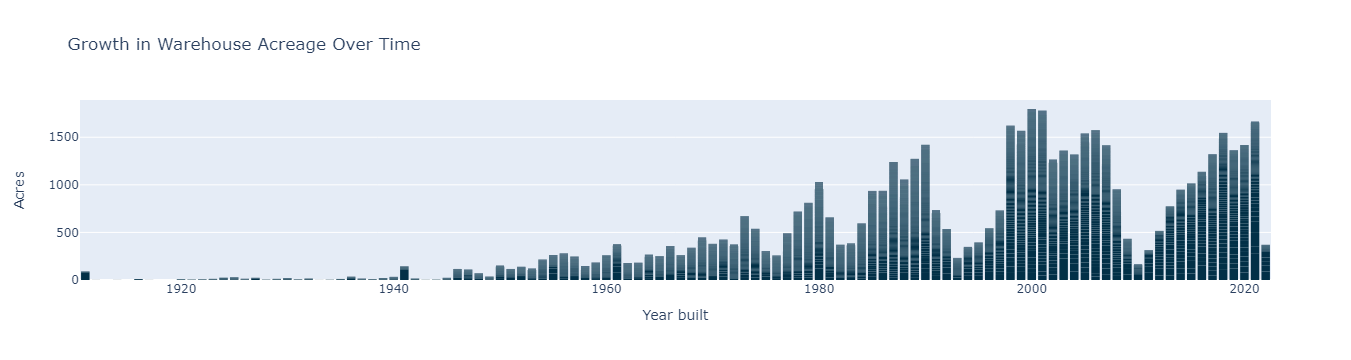

In [33]:
#use plotly to show how the the acreage per warehouse has increased over time
fig = px.bar(wh_new,
             x='Year built',
             y='Acres',
             color_discrete_sequence=['#023047'], # add this line to set bar color
             title ='Growth in Warehouse Acreage Over Time',
            )
fig.update_traces(dict(marker_line_width=0))
fig.show()

# save the interactive chart produced by plotly to html
fig.write_html("Warehouse Acreage.html")

The interactive stacked bar chart above shows the acres of warehouses built over time since 1911. 

We can observe the growth of warehousing in Ontario through this chart. Warehouse acreage has increased steadily over the years since the late 1900s. 

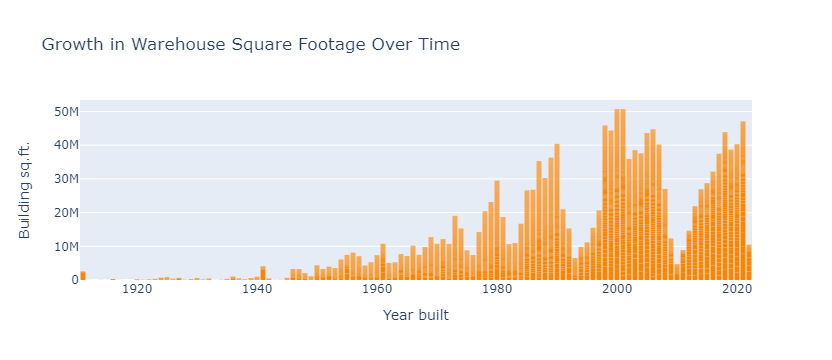

In [34]:
#using plotly to show how the the acreage per warehouse has increased over time
fig = px.bar(wh_new,
             x='Year built',
             y='Building sq.ft.',
             color_discrete_sequence=['#FB8500'], # add this line to set bar color
             title ='Growth in Warehouse Square Footage Over Time'
            )
fig.update_traces(dict(marker_line_width=0))
fig.show()

# save the interactive chart produced by plotly to html
fig.write_html("Warehouse Square Footage.html")

The interactive stacked bar chart above shows the building sq.ft of each warehouse in years. 

We can see that the total sq.ft.of each warehouse have been increasing over the years. 

#### Pie chart - Warehouse Types

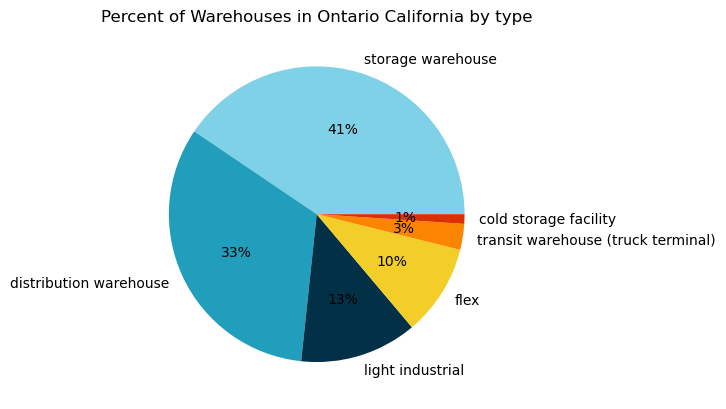

In [12]:
# Specify a list of colors for the pie chart
colors = ['#7ED1E6', '#219EBC', '#023047', '#F3CE28','#FB8500','#dc2f02']

# Creating pie chart of warehouse types in Ontario
Warehouse_Parcel_count = Warehouse_Parcel['Building classification'].value_counts()
ax = Warehouse_Parcel_count.plot(kind='pie',title='Percent of Warehouses in Ontario California by Type',autopct='%1.0f%%',colors=colors)
ax.get_yaxis().set_visible(False)

# save the image produced by matplotlib 
mplt.savefig('Percent of Warehouses.png')

The pie chart above shows the distribution of warehouses based on the type of warehouse for Ontario city. 

This chart tells us that the most common type of warehouse is categorized as 'storage', followed by 'distribution' warehouses and 'light industrial' types. 

## B. Analysis - Environmental, Health, and Social Data

### Charts 

#### Simple bar chart

Environmental data

In [14]:
# Subset the EJ variables to only include fips code and air pollution columns

EJIdata2_pollution = EJI[['geoid','Ozone rank', 'PM 2.5 rank', 'Diesel rank','Air toxics cancer risk']]
EJIdata2_pollution.head()
EJIdata2_pollution.sort_values(by='PM 2.5 rank', ascending=False).head(5)

geoid  Ozone rank  PM 2.5 rank  Diesel rank  Air toxics cancer risk
16  06071001903      0.9865       0.9955       0.7307                  0.8310
36  06071001906      0.9935       0.9955       0.8541                  0.8709
17  06071001905      0.9894       0.9953       0.8064                  0.8851
29  06071002206      0.9938       0.9948       0.8882                  0.9165
18  06071001809      0.9930       0.9947       0.8919                  0.9207

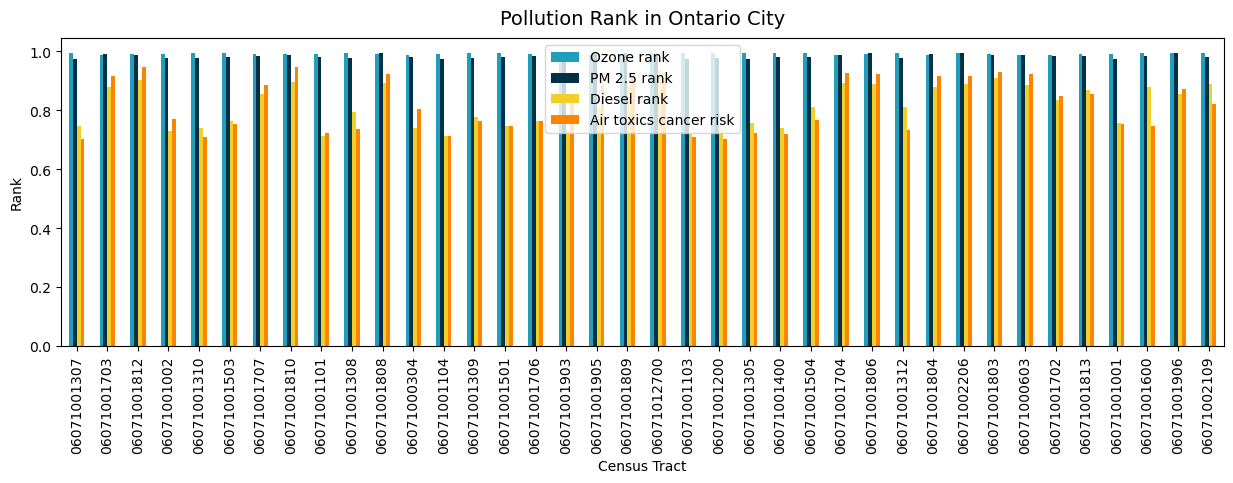

In [15]:
# Specify a list of colors for the bar chart
colors = ['#219EBC', '#023047', '#F3CE28','#FB8500']

# Create bar chart of all air pollution 
fig, ax = mplt.subplots(figsize=(15,4))

EJIdata2_pollution.plot.bar(ax=ax,
                                      x='geoid',
                                      legend=True,
                                      color=colors
                                      )
ax.set_xlabel('Census Tract') # override x label
ax.set_ylabel('Rank') # override y label
ax.set_title("Pollution Rank in Ontario City",fontsize=14,pad=10); # multi-line title with padding

# save the image produced by matplotlib 
mplt.savefig('Pollution Rank.png')

The static bar chart above provides a visualization of the levels of different types of pollutants for each of the census tracts for Ontario. The pollutants are shown as percentiles/ranks. 

The pollutants included in this chart are: 
- Ozone
- PM 2.5
- Diesel
- Air toxics cancer risk (based on continous exposure to pollutants)

This chart is not very helpful since most people don't recognize census tract numbers. A different visualization, such as a map, could provide a better analysis of this data (see maps below). Alternatively, a bar chart of each of the environmental variables could provide information on the census tracts with the highest and lowest levels for each specific pollutant. We provide these charts below. 

#### Interactive bar charts with plotly - Environmental data


##### Ozone pollution

/tmp/ipykernel_262/3719271487.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



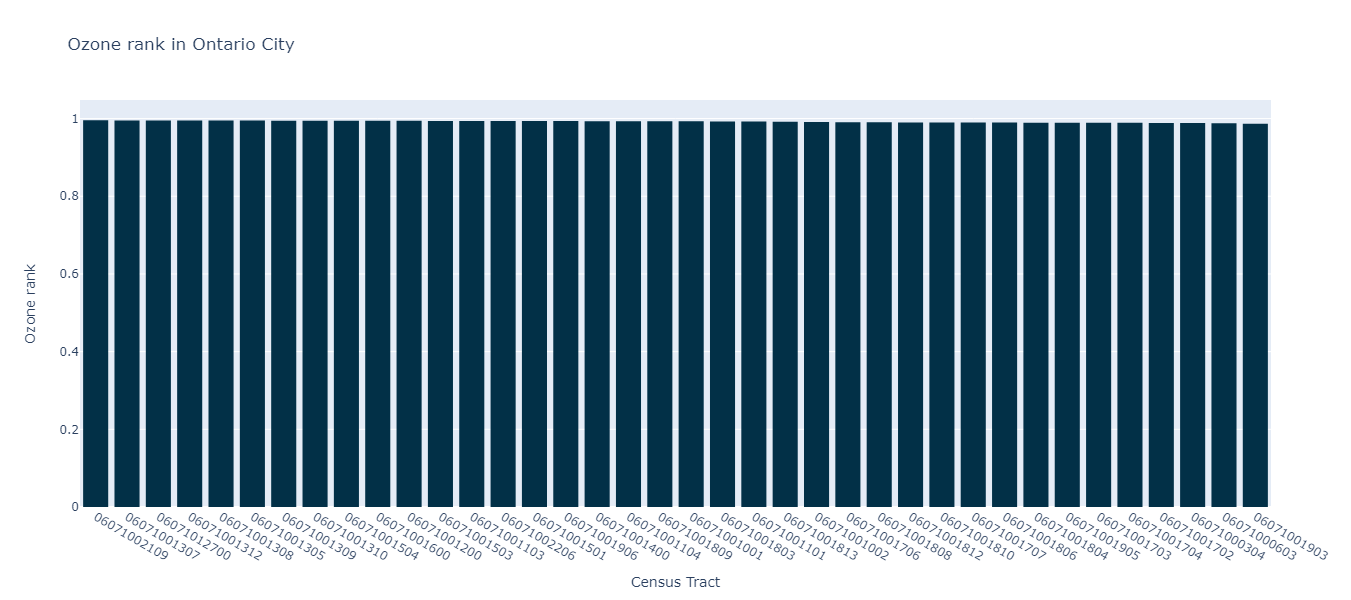

In [35]:
#sort the data in descending order
EJIdata2_pollution.sort_values(by='Ozone rank', ascending=False, inplace = True)

# Create interactive bar chart

# for interactive plots
# add labels by providing a dict
fig = px.bar(
        EJIdata2_pollution,
        x='geoid',
        y='Ozone rank',
        color_discrete_sequence=['#023047'], # add this line to set bar color
        title='Ozone Rank in Ontario City',
        labels={
            'geoid':'Census Tract',       
        },
        height=600
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# save the interactive chart produced by plotly to html 
fig.write_html("Ozone rank.html")

We chose not to use color for the Ozone chart because the difference between census tracts is very minimal. 

All of the census tracts in Ontario have a high risk of exposure to Ozone pollution. 

This is an interactive chart that allows users to hover over the bars to see the values for each of the cencus tracts. 

AttributeError: 'Figure' object has no attribute 'write_html'

##### PM 2.5 pollution

/tmp/ipykernel_262/2409266871.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



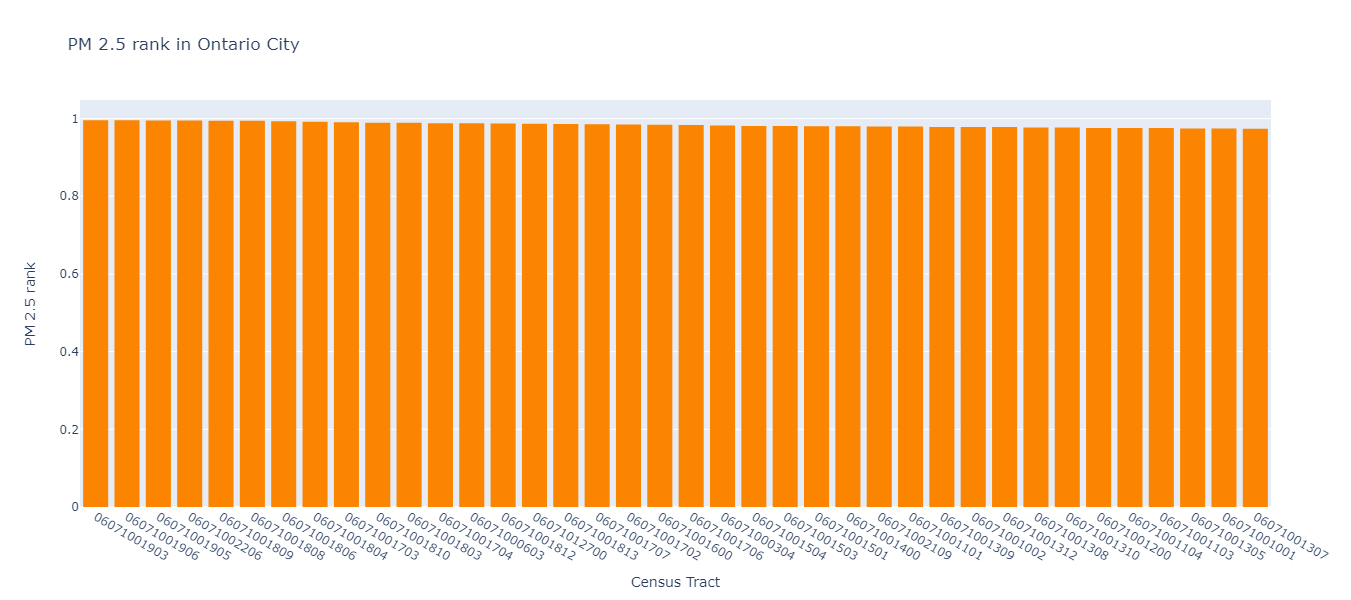

In [26]:
#sort the data in descending order
EJIdata2_pollution.sort_values(by='PM 2.5 rank', ascending=False, inplace = True)

# Create interactive bar chart

# for interactive plots
# add labels by providing a dict
fig = px.bar(
        EJIdata2_pollution,
        x='geoid',
        y='PM 2.5 rank',
        color_discrete_sequence=['#FB8500'], # add this line to set bar color
        title='PM 2.5 Rank in Ontario City',
        labels={
            'geoid':'Census Tract',       
        },
        height=600
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# save the interactive chart produced by plotly to html 
fig.write_html("PM 2.5 rank.html")

The PM 2.5 chart also showed small differences between census tracts. 

All census tracts in Ontario have a high risk of PM 2.5 pollution exposure. 

This is an interactive chart that allows users to hover over the bars to see the values for each of the cencus tracts. 

##### Diesel pollution

![alt text](color_dict/color_palette2.jpg)

/tmp/ipykernel_262/4032772341.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



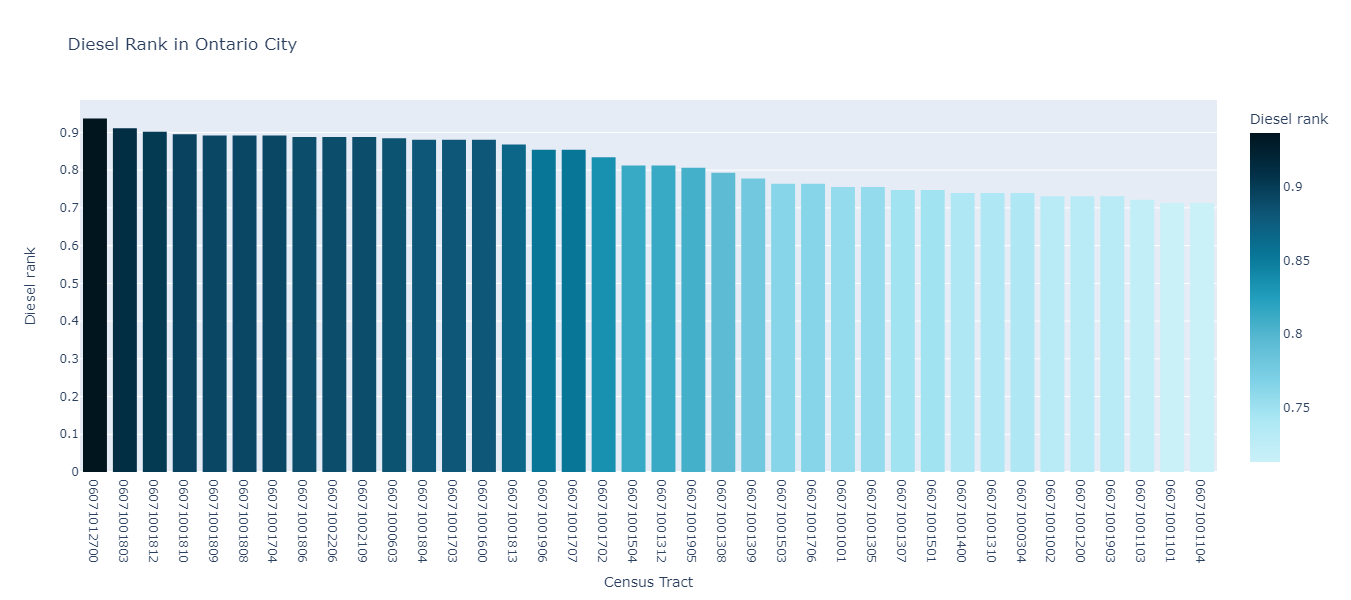

In [27]:
#sort the data in descending order
EJIdata2_pollution.sort_values(by='Diesel rank', ascending=False, inplace = True)

# Create interactive bar chart

# Specify a list of colors for the bar chart
colors = ['#CAF0F8', '#ADE8F4', '#7ED1E6', '#58B9D1', '#219EBC', '#087798', '#0E5778', '#023047', '#01151f'] 


# for interactive plots
# add labels by providing a dict
fig = px.bar(
        EJIdata2_pollution,
        x='geoid',
        y='Diesel rank',
        color = 'Diesel rank',
        color_continuous_scale = colors,
        title='Diesel Rank in Ontario City',
        labels={
            'geoid':'Census Tract',       
        },
        height=600
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# save the interactive chart produced by plotly to html
fig.write_html("Diesel rank.html")

The Diesel rank chart does show a lot more variation between census tracts. This is likely due to many factors, including the proximity to high occupancy roads or highways, that each census tract has. Despite these differences, about half of the census tracts face very high risk of Diesel pollution exposure, while the rest of the tracts have high and moderate levels of Diesel exposure.  

This is an interactive chart that allows users to hover over the bars to see the values for each of the cencus tracts. 

##### Cancer risk - air toxins exposure

/tmp/ipykernel_262/2379713295.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



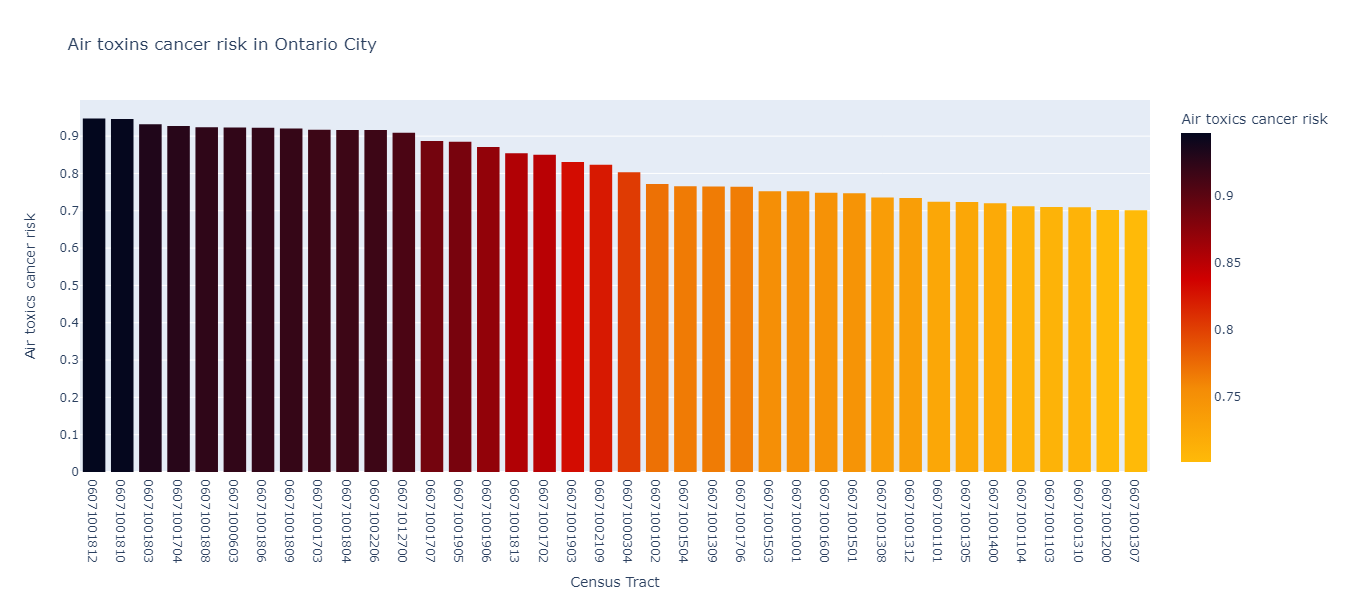

In [28]:
#sort the data in descending order
EJIdata2_pollution.sort_values(by='Air toxics cancer risk', ascending=False, inplace = True)

# Create interactive bar chart

# Specify a list of colors for the bar chart
colors = ['#ffba08', '#faa307', '#f48c06', '#e85d04', '#dc2f02', '#d00000', '#9d0208', '#6a040f', '#370617', '#03071e']


# for interactive plots
# add labels by providing a dict
fig = px.bar(
        EJIdata2_pollution,
        x='geoid',
        y='Air toxics cancer risk',
        color = 'Air toxics cancer risk',
        color_continuous_scale = colors,
        title='Air Toxins Cancer Risk in Ontario City',
        labels={
            'geoid':'Census Tract',       
        },
        height=600
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# save the interactive chart produced by plotly to html
fig.write_html("Air toxic cancer risk.html")

The cancer risk chart shows in which census tracts people have the highest risk of developing cancer due to continuous exposure to air pollutants.

This is an interactive chart that allows users to hover over the bars to see the values for each of the cencus tracts. 

#### Interactive Scatterplots with Plotly - Environmental and Health data

We would like to know the relationship between pollution and health in Ontario City. We selected 'Environmental burden rank' as our independent variable and health ranks, including 'high blood pressure rank','asthma rank', 'cancer rank', 'mental health rank', and 'diabetes rank' as our independent variables to produce scatterplots.  

In [17]:
# Subset the EJ variables to only include fips code, health %, and environmental burden columns

EJIdata_health1 = EJI[['geoid','Environmental burden rank','% high blood pressure','% asthma', '% cancer', '% mental health','% diabetes']]
EJIdata_health1.sort_values(by='Environmental burden rank', ascending=False).head(5)

geoid  Environmental burden rank  % high blood pressure  % asthma  \
5   06071001503                     0.9996                   23.6      10.7   
30  06071001803                     0.9934                   30.3       9.6   
35  06071001600                     0.9914                   27.2      10.7   
2   06071001812                     0.9883                   27.5       9.8   
33  06071001813                     0.9868                   25.5       9.8   

    % cancer  % mental health  % diabetes  
5        3.0             19.3        12.1  
30       6.3             13.7        13.3  
35       3.5             19.2        14.9  
2        4.2             15.8        13.7  
33       3.5             16.2        12.5

In [30]:
# Subset the EJ variables to only include fips code, health rank, and environmental burden columns

EJIdata_health2 = EJI[['geoid','Environmental burden rank','high blood pressure rank','asthma rank', 'cancer rank', 'mental health rank','diabetes rank']]
EJIdata_health2.sort_values(by='Environmental burden rank', ascending=False).head(5)

geoid  Environmental burden rank  high blood pressure rank  \
5   06071001503                     0.9996                    0.0881   
30  06071001803                     0.9934                    0.4037   
35  06071001600                     0.9914                    0.2282   
2   06071001812                     0.9883                    0.2437   
33  06071001813                     0.9868                    0.1497   

    asthma rank  cancer rank  mental health rank  diabetes rank  
5        0.7373       0.0170              0.9171         0.6563  
30       0.4568       0.4075              0.4677         0.7596  
35       0.7373       0.0302              0.9135         0.8547  
2        0.5157       0.0785              0.6957         0.7878  
33       0.5157       0.0302              0.7328         0.6944

##### Loop over health data 

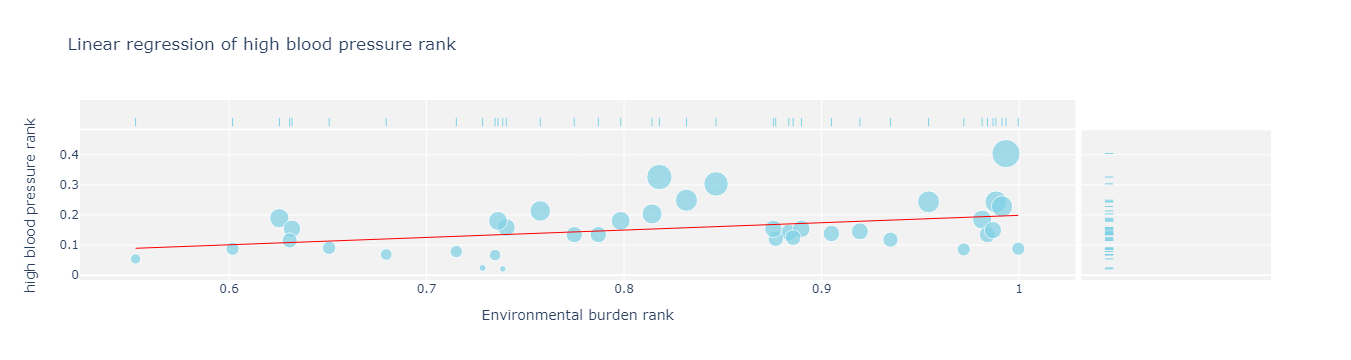

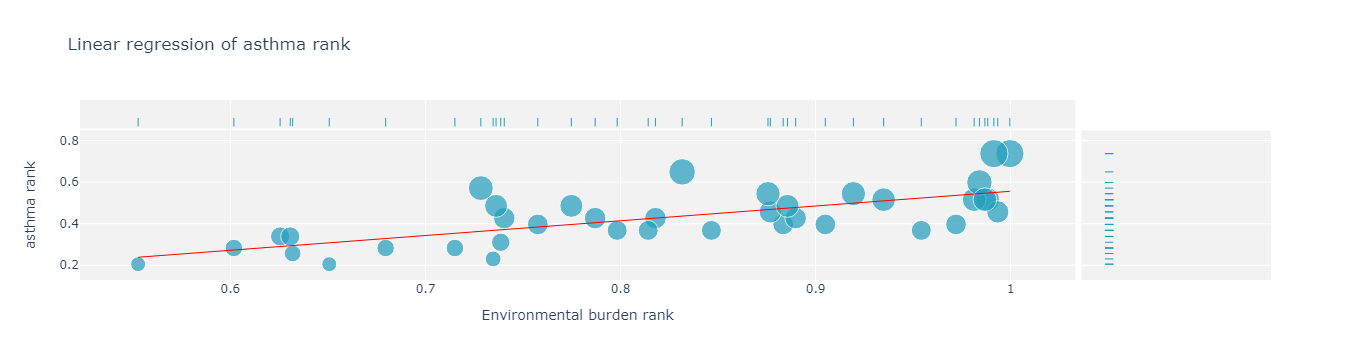

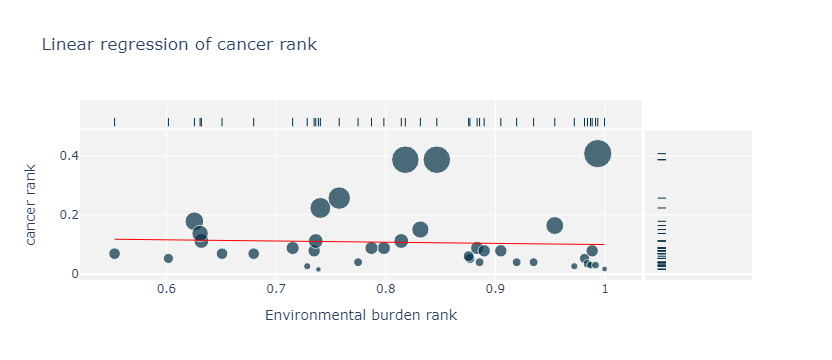

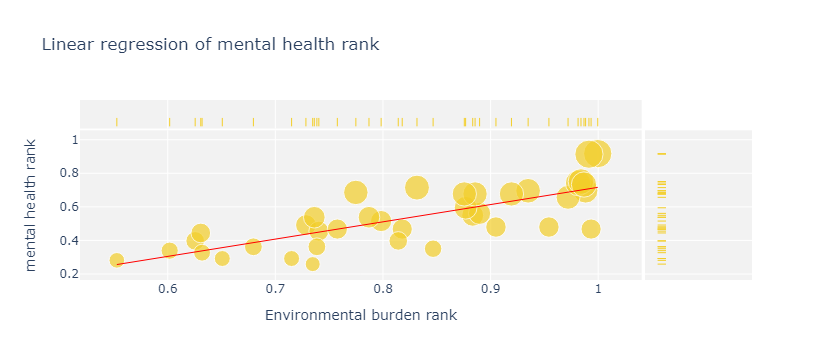

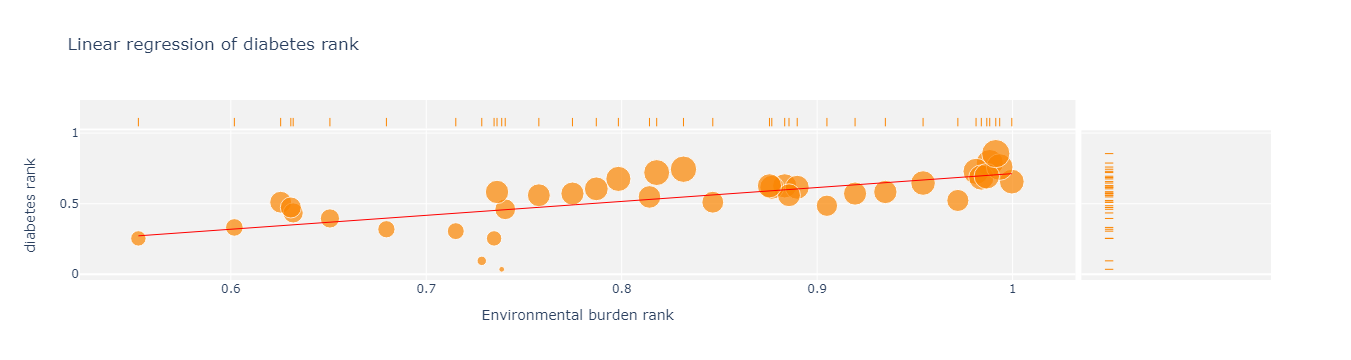

In [36]:
# Use loop to create the scatterplots of health and environmental burden rank

# Specify a list of colors for each health data
colors = ['#7ED1E6','#219EBC','#023047','#F3CE28','#FB8500']

# Create a list of healths 
healths = ['high blood pressure rank',
          'asthma rank',
          'cancer rank',
          'mental health rank',
          'diabetes rank']

# Create a loop, and zip health and the color on by one
for health, color in zip(healths, colors): 
    fig = px.scatter(EJIdata_health2, 
                     x="Environmental burden rank", 
                     y=health,
                     title='Linear Regression of '+ health.title(),
                     trendline='ols',                          # Give the regression line
                     trendline_color_override='red',           # Decide the color the regression line
                     size=health, 
                     hover_data=['Environmental burden rank'],
                     hover_name='geoid',
                     color_discrete_sequence=[color],          
                     marginal_x="rug",                         # Add rug plot to x axis
                     marginal_y="rug")                         # Add rug plot to y axis
    
    fig.update_traces(line=dict(width=1))                      # Adjust line width
    fig.update_layout(plot_bgcolor='#F2F2F2')                  # Adjust background
    
    fig.show()
    
    # Save the scatter plot as an HTML file
    fig.write_html('Linear regression of ' + health + '_scatter.html', auto_open=False)

Except for cancer rank, all the other health outcomes and environmental burden have positive relationship. 
Here is the outcome:

1. high blood pressure rank = 0.244392 * Environmental burden rank - 0.045539 (R sqruare = 0.153384)
2. asthma rank = 0.709783 * Environmental burden rank - 0.153588 (R sqruare = 0.492001)
3. cancer rank = -0.0403194 * Environmental burden rank - 0.139942 (R sqruare = 0.002675)
4. mental health rank = 1.02896 * Environmental burden rank - 0.312528 (R sqruare = 0.592882)
5. diabetes rank = 0.98481 * Environmental burden rank - 0.271904 (R sqruare = 0.787)

Of all the health outcomes, mental health (coeffecient = 1.02896) has the highest correlation with environmental burden, and diabetes (coeffecient = 0.98481) comes the second. Asthma (coeffecient = 0.709783) is also highly related to environmental burden. High blood pressure and cancer have very little relationship with environmental burden. Out of our surprise, instead of physical health, mental health is actually the most sensitive to environmental burden.         


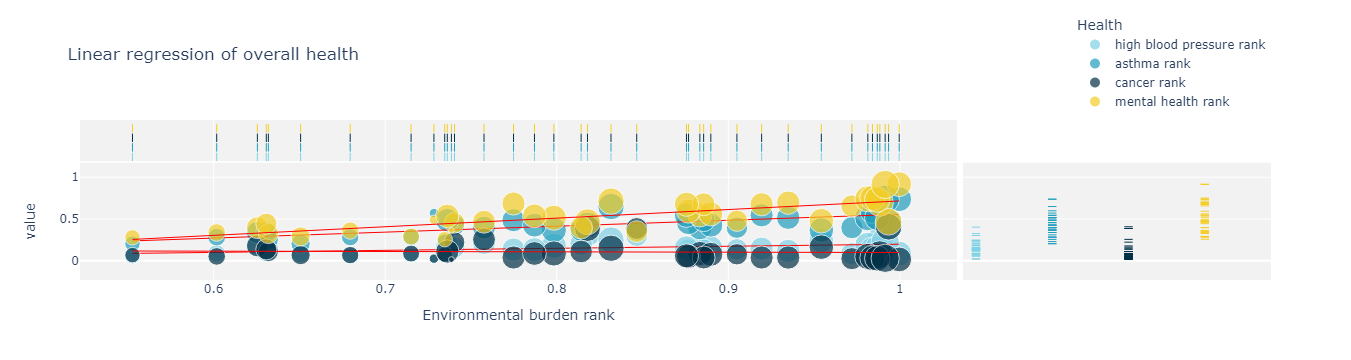

In [32]:
# Put all the linear regressions together 

# Specify a list of colors for each health data
colors = ['#7ED1E6','#219EBC','#023047','#F3CE28','#FB8500']

# Create a list of healths 
healths = ['high blood pressure rank',
          'asthma rank',
          'cancer rank',
          'mental health rank',
          'diabetes rank']

 
fig = px.scatter(EJIdata_health2, 
                     x="Environmental burden rank", 
                     y= healths,
                     title='Linear Regression of Overall Health',
                     trendline='ols',                                  # Give the regression line
                     trendline_color_override='red',                   # Decide the color the regression line
                     size=health, 
                     hover_data=['Environmental burden rank'],
                     hover_name='geoid',
                     color_discrete_sequence= colors,          
                     marginal_x="rug",                                 # Add rug plot to x axis
                     marginal_y="rug")                                 # Add rug plot to y axis
    
fig.update_traces(line=dict(width=1))                                  # Adjust line width
fig.update_layout(plot_bgcolor='#F2F2F2',                              # Adjust background
                 legend=dict(title_text='Health',                      # Adjust legend
                             yanchor="bottom",
                             y=1.02,
                             xanchor="right",
                             x=1))
    
fig.show()

# save the interactive chart produced by plotly to html
fig.write_html("Linear regression of overall health.html")

Putting all the linear regressions together makes it easier to see the relationships between environmental burden and healths.    

### Maps - environmental, health, and social data

/tmp/ipykernel_262/106459341.py:47: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_262/106459341.py:47: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_262/106459341.py:47: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_262/106459341.py:47: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_262/106459341.py:47: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' a

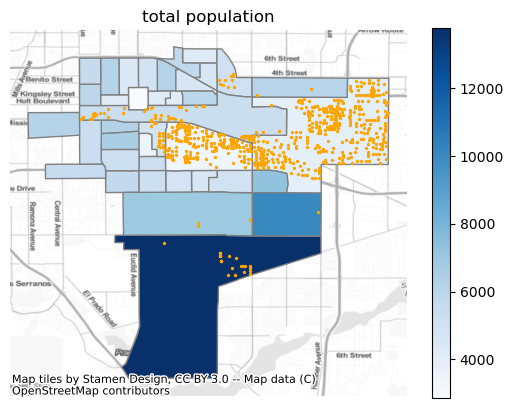

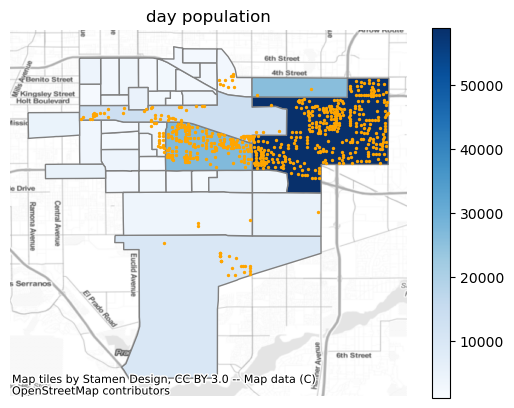

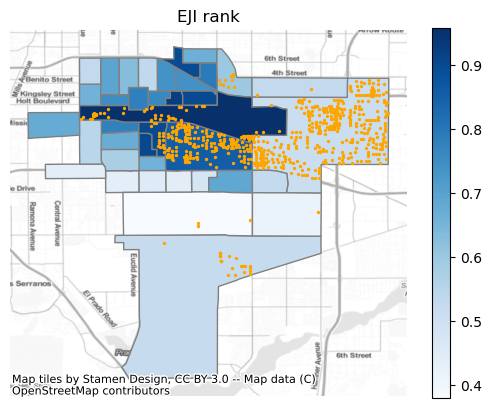

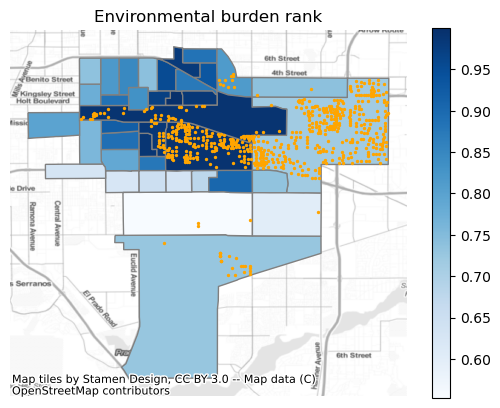

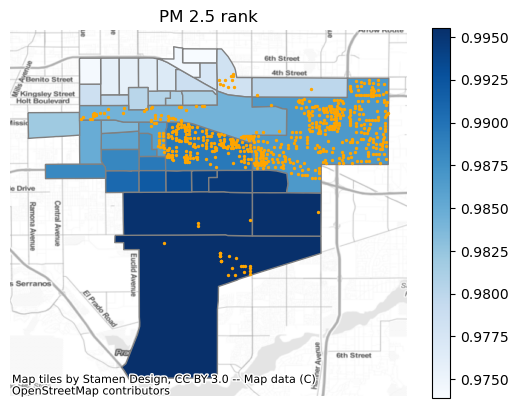

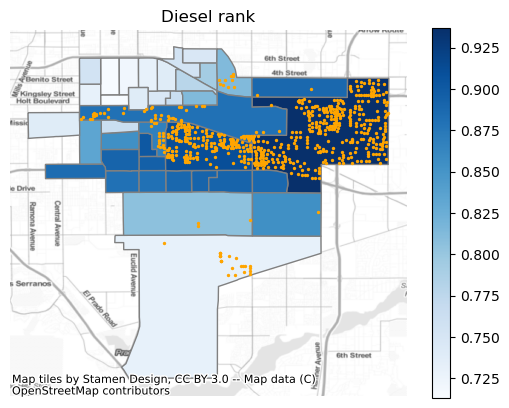

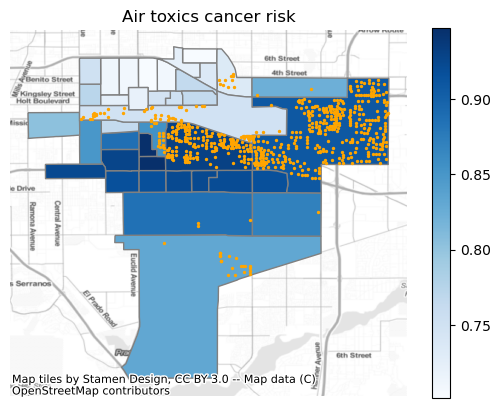

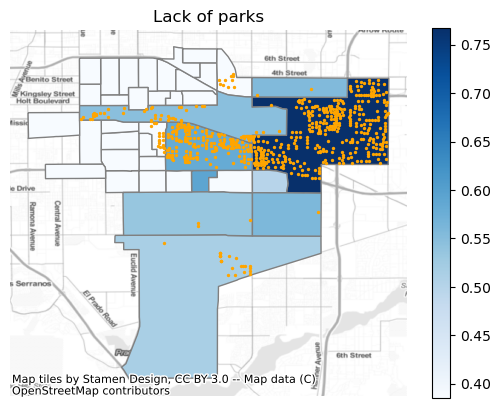

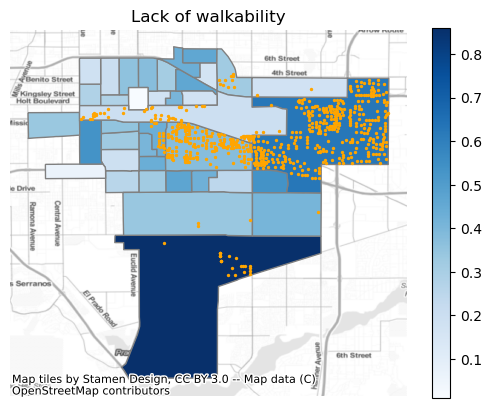

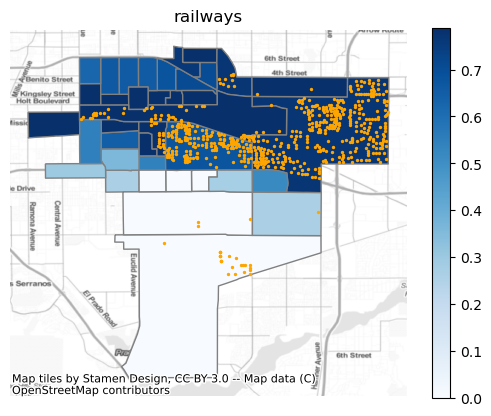

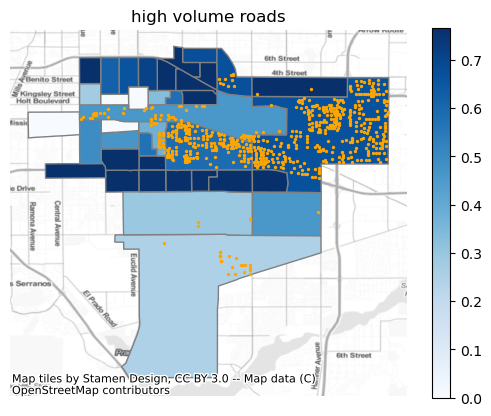

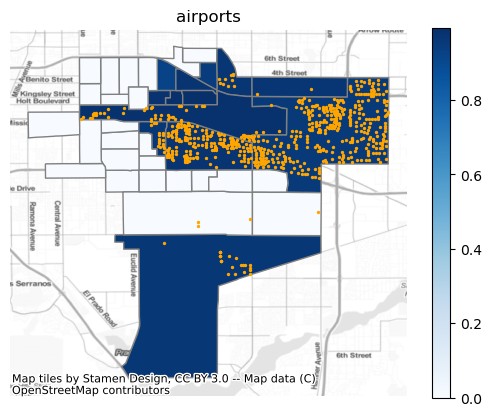

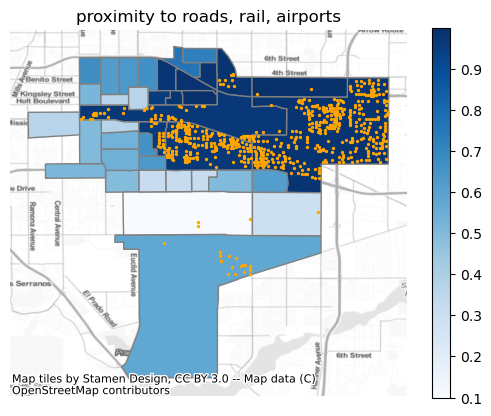

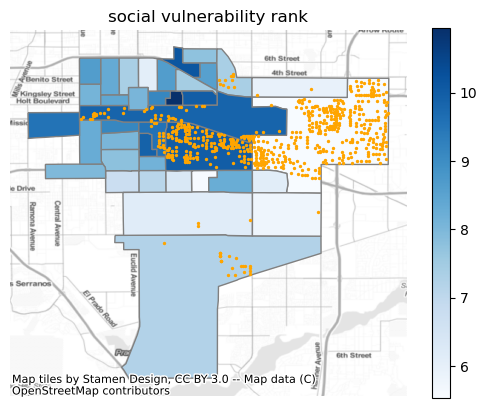

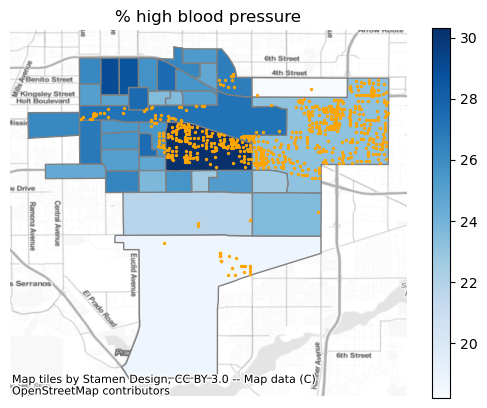

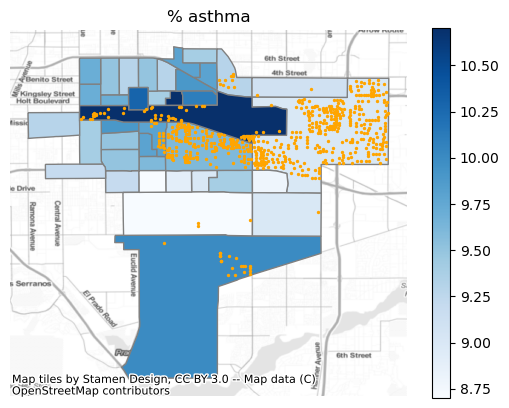

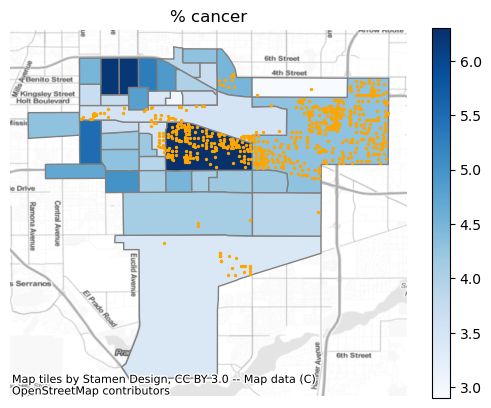

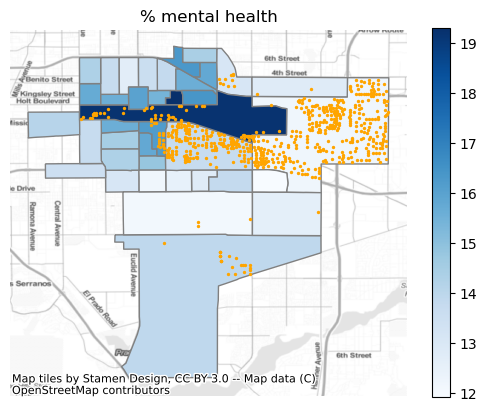

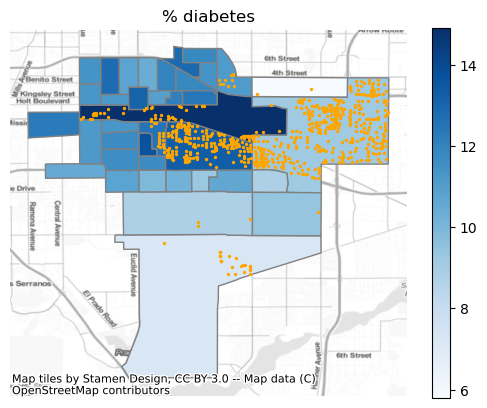

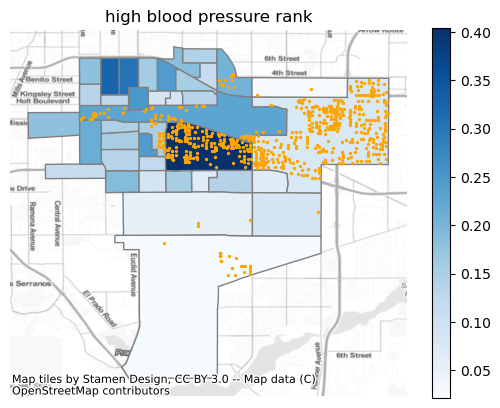

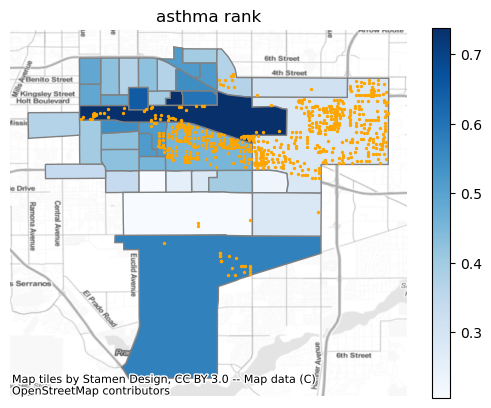

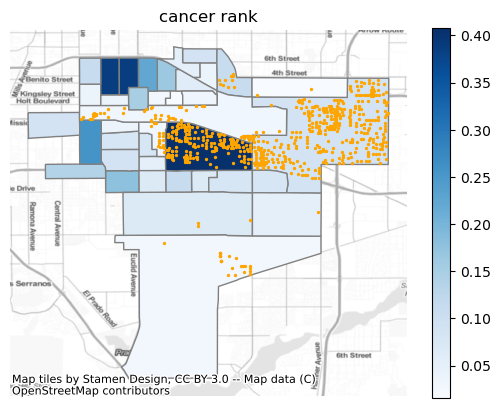

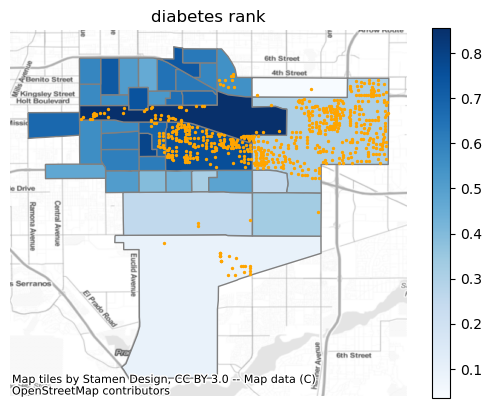

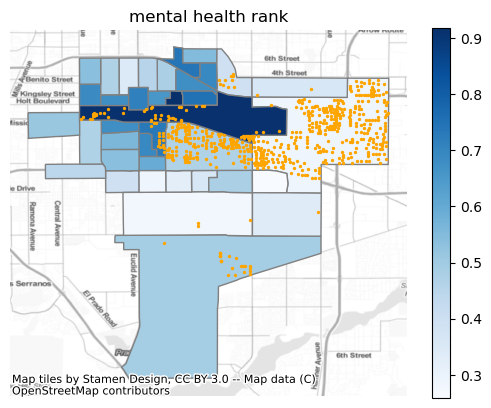

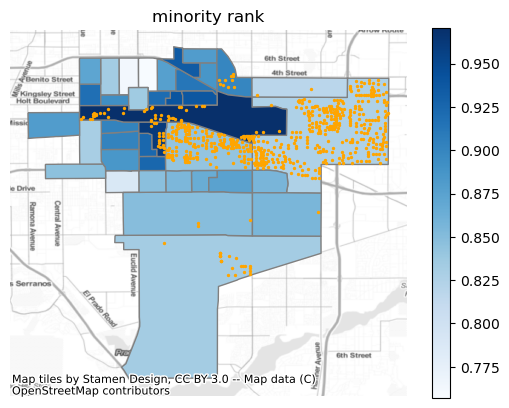

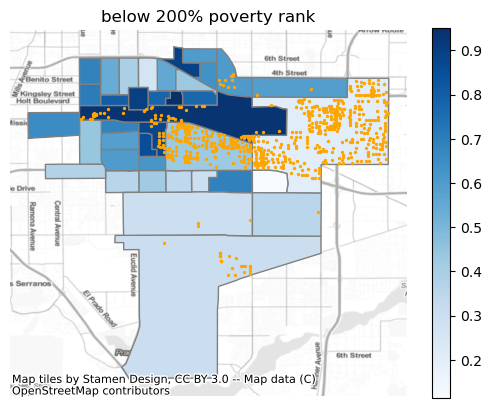

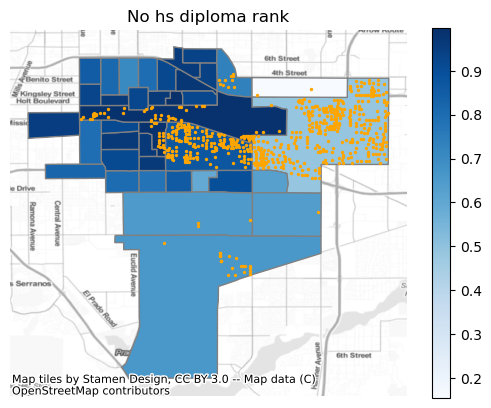

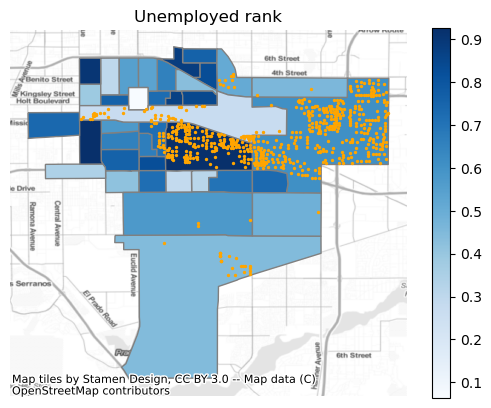

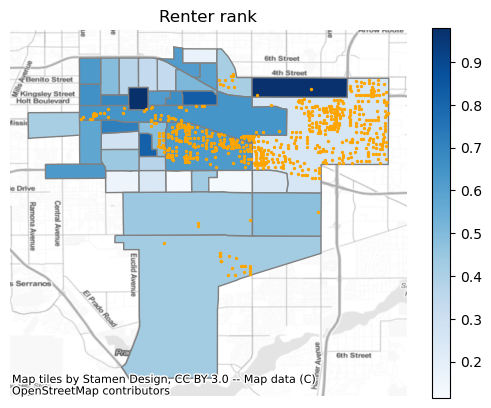

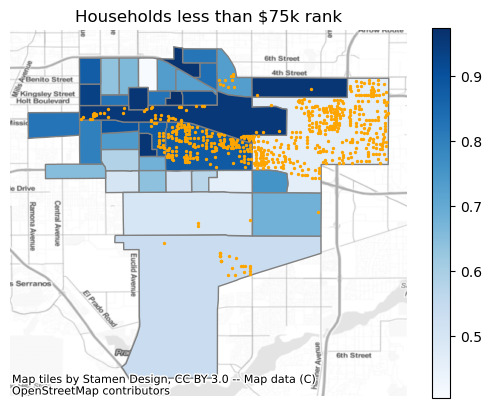

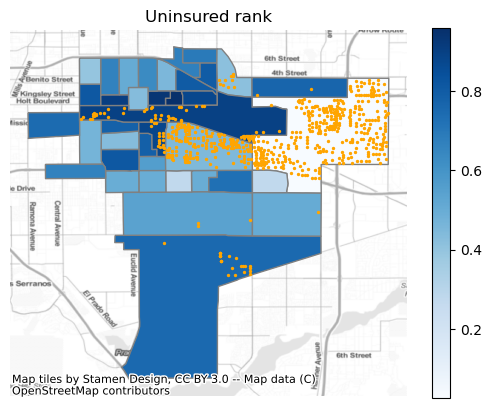

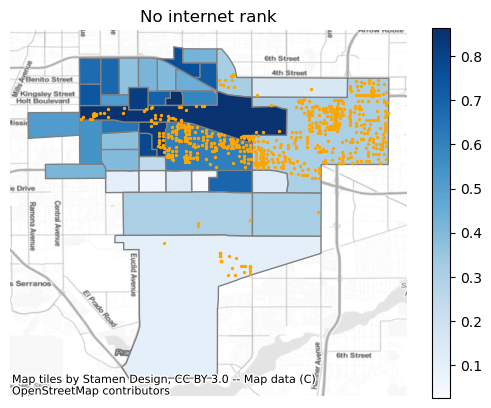

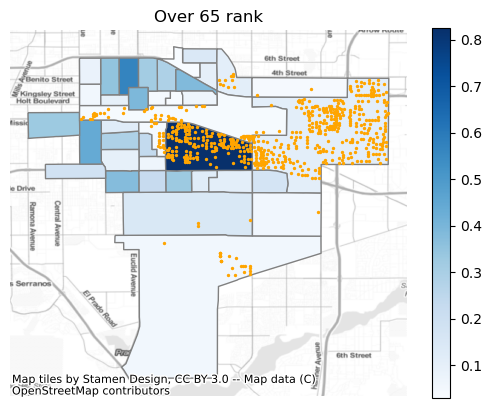

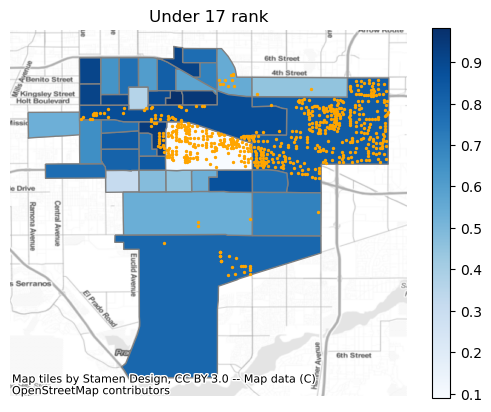

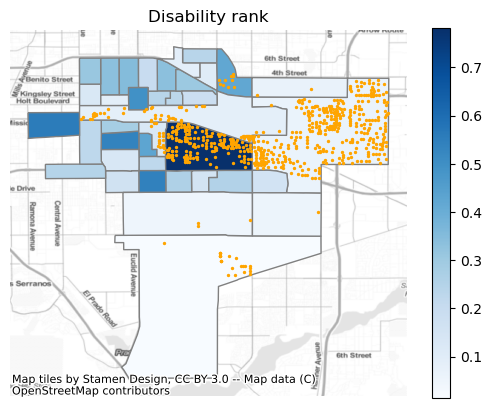

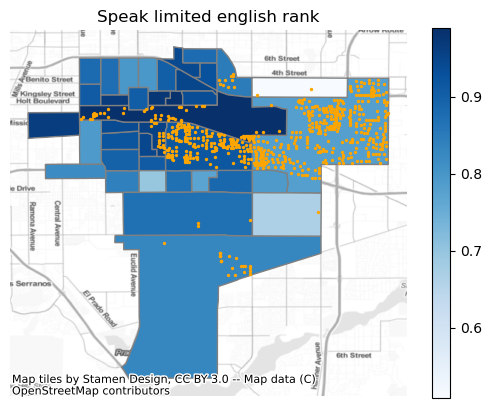

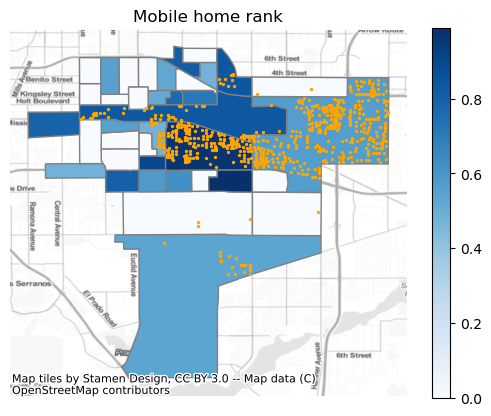

In [45]:
# using a loop to create the maps

variables = ['total population',
 'day population',
 'EJI rank',
 'Environmental burden rank',
 'PM 2.5 rank',
 'Diesel rank',
 'Air toxics cancer risk',
 'Lack of parks',
 'Lack of walkability',
 'railways',
 'high volume roads',
 'airports',
 'proximity to roads, rail, airports',
 'social vulnerability rank',
 '% high blood pressure',
 '% asthma',
 '% cancer',
 '% mental health',
 '% diabetes',
 'high blood pressure rank',
 'asthma rank',
 'cancer rank',
 'diabetes rank',
 'mental health rank', 
 'minority rank',
'below 200% poverty rank',
'No hs diploma rank',
'Unemployed rank',
'Renter rank',
 'Households less than $75k rank',
 'Uninsured rank',
 'No internet rank',
 'Over 65 rank',
 'Under 17 rank',
 'Disability rank',
 'Speak limited english rank',
 'Mobile home rank']

# Specify a list of colors 
colors = ['#023047','#219EBC','#7ED1E6','#CAF0F8','#F3CE28','#FB8500','#DC2F02','#DC2F02','#370617'] 

# Loop the variables
for variable in variables:
    ax = EJI.plot(column=variable, cmap = 'Blues', edgecolor="Grey", legend=True)
    Warehouse_Parcel_Geo.centroid.plot(ax=ax, color='orange',markersize=2);
    ax.set_title(variable)
    ax.set_axis_off()
    ctx.add_basemap(ax, crs=4326, source = ctx.providers.Stamen.TonerLite,
                    alpha=0.7)
    plt.title(variable.title())
    # Save plot as PNG file
    mplt.savefig(variable + '.png')


We used a loop to create the maps above to analyze a handful of environmental, health, and social metrics and their relationship to warehouse locations in Ontario. Below are some observations from these maps for each variable. 

#### Total population
The majority of the warehouses are located in census tracts with lower population levels.
#### Day population
The day population is highest for the census tracts where the majority of the warehouses are in. That means that the people who work in Ontario are directly impacted by the warehouses through geographic proximity.
#### EJI rank'
The EJI rank measures overal environmental justice for communities. The map shows that the census tracts near warehouses face envrionmental justice concerns. 
#### Environmental burden rank
Census tracts near or with warehouses have higher environmental burden ranks. 
#### PM 2.5 rank
From the chart above, we know that PM 2.5 is very similar for all census tracts so this map doesn't tell us too much information. 
#### Diesel rank
The map shows a correlation between warehouses and diesel pollution risk 
#### Air toxics cancer risk
There seems to be some correlation between air toxic cancer risk and the location of warehouses but the correlation is not strong since other census tracts with limited warehouse presence also have high air toxic cancer risk levels. 
#### Lack of parks
This map might help explian the Air toxics cancer risk anomaly explained above since the census tracts with higher levels of air toxics cancer risk seem to lack parks. 
#### Lack of walkability
No notable observations for this variable. 
#### railways
This map makes sense since warehouses need access to railway infrastructure. The higher levels for the railways were inside the census tracts with hihgh numbers of warehouses. 
#### high volume roads
Similarly, census tracts with high volume roads were mostly next to or in the census tracts with the most warehouse precense. 
#### airports
Almost all the warehouses in Ontario are in census tracts with high levels of proximity to airports. 
#### proximity to roads, rail, airports
This variable adds up the previous 3 variables. The map shows that the most connected (rails, roads, airports) census tracts are those that have a hogh concentration of warehouses. 
#### social vulnerability rank
This variable comes from the Social Vulnerability Index published by the CDC. The map shows that many of the residents in Ontario have a high SVI score, but there's not a clear connetion to warehouse location. This could be due to the fact that most people in Ontario don't tend to live in census tracts with high concentrations of warehouses, but they might work there and spend a big chunk of the life directly exposed to the negative effects of warehouses. 

The following variables might be similarly impacted by population (where people live vs. where they work, play, study, etc.). For example, many people might asthma in one census tract without any warehouses. From this data, we don't know if the majority of the people with asthma frequent the census tracts with high concentrations of warehouses. More investigation is needed to understand if there's a link between warehouses and health metrics but it's not likely possible to do since that kind of detailed health data is typically not publicly accessible. 
#### % high blood pressure
Some relationship between warehouses and people with high blood pressure
#### % asthma
Varied relationship between warehouses and people with asthma 
#### % cancer
Some relationship between warehouses and people with cancer
#### % mental health
Limited relationship between warehouses and mental health
#### % diabetes  
Varied relationship between warehouses and people with diabetes 
#### high blood pressure rank
Varied relationship between warehouses and people with high blood pressure (percentile)
#### asthma rank
Limited relationship between warehouses and people with asthma (percentile) 
#### cancer rank
Varied relationship between warehouses and people with cancer (percentile)
#### diabetes rank
Some relationship between warehouses and people with diabetes (percentile)
#### mental health rank
Limited relationship between warehouses and mental health (percentile)

---
#### The following variables were added into the loop per recommendations by our classmates to consider demographic data:
- 'minority rank',
- 'below 200% poverty rank',
- 'No hs diploma rank',
- 'Unemployed rank',
- 'Renter rank',
- 'Households less than $75k rank',
- 'Uninsured rank',
- 'No internet rank',
- 'Over 65 rank',
- 'Under 17 rank',
- 'Disability rank',
- 'Speak limited english rank',
- 'Mobile home rank'

These variables make up the SVI (which was previously included in our analysis). For future analysis, we want to move this demographic data up to our introduction to help paint a picture of who lives in Ontario. 

---
Now we have the static maps of all health, air pollution, and some EJ variables that showing their ranks and relationships with warehouses.   

#### Creating an Interactive Map of Desiel emisions in Ontario

Often times, its useful for urban planners to see the spatial relationships between infrastructture, ammentieies, and environmental conditions. To do this, we can use the Folium library along with our census tract data to create an interactive map. For this project, we would like to see the spatial relation between desiel emisions, the airport, public parks, and schools. Let's start by bringing in all our necessary data and python libraries.

In [17]:
# See all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import the file and convert the datatypes
EJIdata3=pd.read_csv('../../Data/EJI Variables and Warehouse Marked.csv')
EJIdata3['geometry'] = EJIdata3['geometry'].apply(wkt.loads)
EJIdata3 = gpd.GeoDataFrame(EJIdata3, geometry='geometry', crs="EPSG:4326")
airports=gpd.read_file('../../Data/Airport_Schools_Parks_Location/Airport_Boundaries_Ontario.geojson')
parks=gpd.read_file('../../Data/Airport_Schools_Parks_Location/CPAD_Shapes/CPAD_2022b_Holdings.shp')
schools=gpd.read_file('../../Data/Airport_Schools_Parks_Location/California_Schools_2021-22_San Berdarnido.geojson')

Now using Folium, we can begin to explore the data that we have. We have to reproject the parks files as well, to keep in the system projection system as the other data.

In [18]:
schools=schools[schools['City']=='Ontario'];

parks.to_crs(epsg=4326, inplace=True);
parks1=parks[parks['CITY']=='Ontario'];
parks1["geometry"] = parks1["geometry"].centroid

/tmp/ipykernel_262/1694539781.py:5: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
#start our map
m = folium.Map(location=[34.041103, -117.597585],
               zoom_start = 13,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# Specify a list of colors for the bar chart
colors = ['#03071e','#370617','#6a040f','#9d0208','#d00000','#dc2f02','#e85d04','#f48c06','#faa307','#ffba08']

            #color = 'Air toxics cancer risk',
            #color_continuous_scale = color
# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=EJIdata3, # geo data
                  data=EJIdata3, # data          
                  key_on='feature.properties.geoid', # key, or merge column
                  columns=['geoid','Diesel rank'], # [key, value]
                  fill_color='Blues',
                  line_weight=0.3, 
                  fill_opacity=0.6,
                  line_opacity=0.8, # line opacity (of the border)
                  legend_name='Diesel Emission Percentile Rank').add_to(m)    # name on the legend color bar
#Add the Airport in Red
folium.Marker([34.05627, -117.59574], popup='<i>Ontario Airport</i>', icon=folium.Icon(color="red")).add_to(m)

#Add the Schools in Blue
for index, row in schools.iterrows():
    # add folium marker code
    folium.Marker([row.geometry.y, row.geometry.x], popup=row.SchoolName, tooltip=row.SchoolName, icon=folium.Icon(color="darkblue")).add_to(m)
    
# Add the Parks in Green
for index, row in parks1.iterrows():
    # add folium marker code
    folium.Marker([row.geometry.y, row.geometry.x], popup=row.SITE_NAME, tooltip=row.SITE_NAME, icon=folium.Icon(color="orange")).add_to(m)
    # add folium marker code
m

In [21]:
# save the folium map to html
m.save('Desiel emisions.html')

This interactive map can tell us about a select variable (in this case 'Diesel Rank') and the connection of that rank to the locations of schools, parks, and the Ontario airport. 

We hope to expand on this map as our project progresses to add more interactive features. 

## C. Analysis - Land Uses

#### Basic bar chart - Ontario land use data

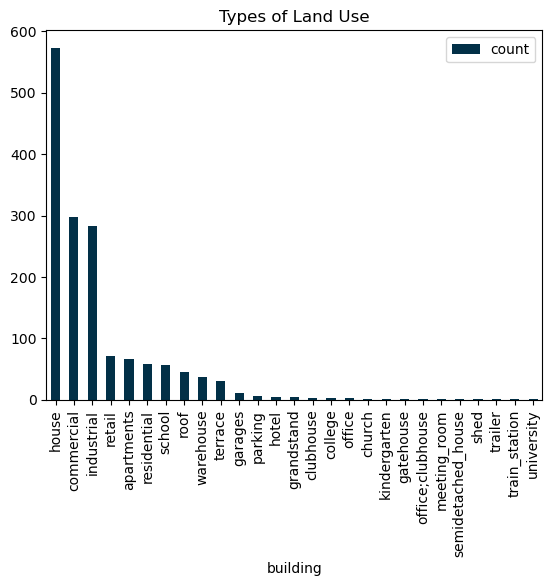

In [25]:
# Count the numbers of each building type.
osm_build_count=osm.value_counts(['building']).reset_index(name="count")
osm_build_count

#Visualizing the data through a bar chart
osm_build_count.plot.bar(x='building', title= 'Types of Land Use', color ='#023047');


The bar chart above shows the counts for each type of land uses that are close to the Ontario airport.

The chart tells is that the most common types of land uses in Ontario are residential, followed by commercial and industrial land uses.  

#### Improved bar chart - Ontario land use data

NameError: name 'address' is not defined

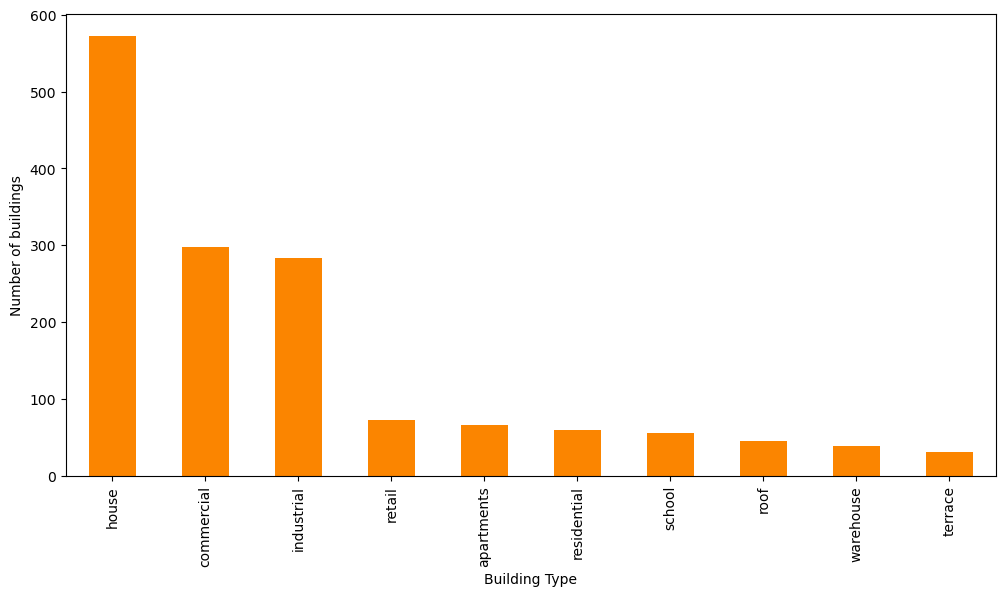

In [26]:
#creating a more readable chart for Ontario land uses

fig, ax = mplt.subplots(figsize=(12,6))

osm_build_count[:10].plot.bar(ax=ax,
                                      x='building',
                                      y='count',
                                      legend=False,
                                      color ='#FB8500'
                                      )
ax.set_xlabel('Building Type') # override x label
ax.set_ylabel('Number of buildings') # override y label
ax.set_title("Top 10 building types\n"+address,fontsize=14,pad=10); # multi-line title with padding

In the chart above, we added a title, labels for the y and x axis, and adjusted the size of the chart to make it more readable. 

#### Interactive bar chart - Ontario land use data

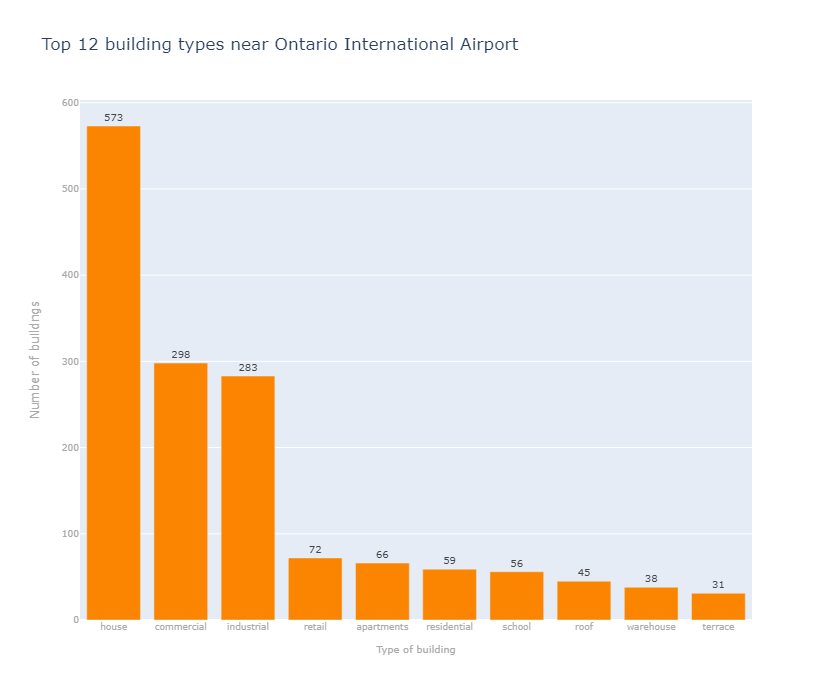

In [27]:
# creating a plotly interactive chart

fig = px.bar(osm_build_count.head(10),
        x='building',
        y='count',
        title="Top 12 Building Types Near Ontario International Airport", 
        text_auto = True,
        height=700,
        width=900,
        color_discrete_sequence =['#FB8500']*len(osm_build_count),
        labels={
                'count': 'Number of buildngs',
                'building': 'Type of building',
        })

# labeling the bar
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# labeling the axes
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()

The chart aove is an interactive bar chart showing the counts of all building types in Ontario.

#### Land Uses Maps/Plots
Maps to visualize the building land uses in Ontario city.

<AxesSubplot: >

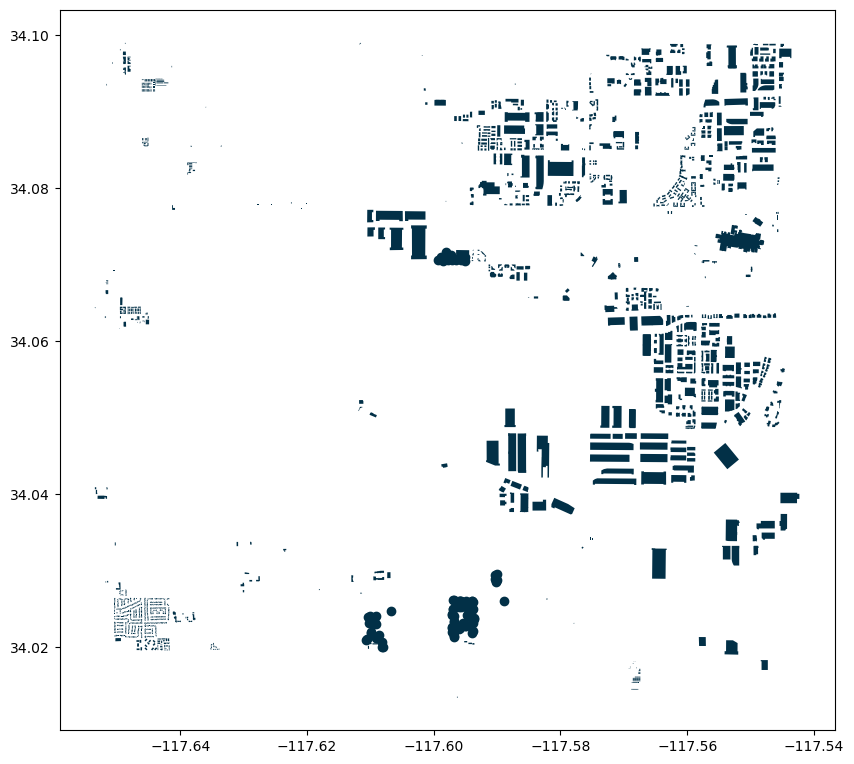

In [28]:
# Plot the osm dataframe, whichs contain the building types and geometry information
osm.plot(figsize=(10,10), color = '#023047')

In [29]:
#removing unwanted building types using .loc
osm.drop(osm.loc[osm['building']=='trailer'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='church'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='clubhouse'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='garages'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='office;clubhouse'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='office'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='parking'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='college'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='gatehouse'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='hotel'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='roof'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='terrace'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='shed'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='meeting_room'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='grandstand'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='semidetached_house'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='train_station'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='kindergarten'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='commercial'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='apartments'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='retail'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='school'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='university'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='residential'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='house'].index,inplace=True)

<AxesSubplot: >

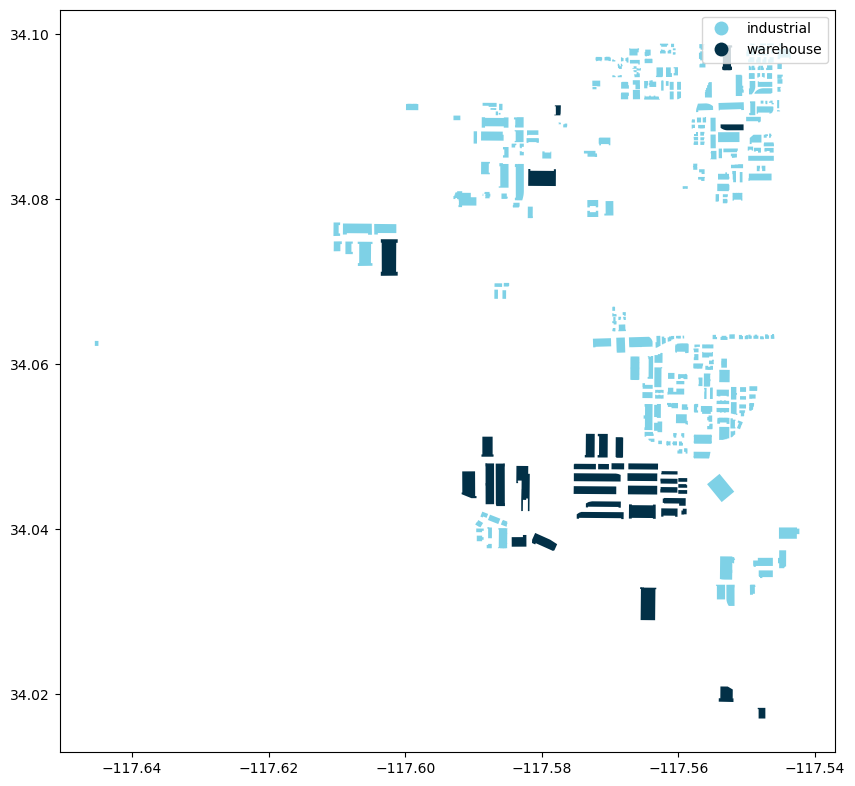

In [30]:
#Color coding the buildings

# import colors from library
import matplotlib.colors as colors

# Define a list of colors
colors_list = ['#7ED1E6','#023047']

# Create a colormap from the list of colors
cmap = colors.ListedColormap(colors_list)

osm.plot(figsize=(10,10),
         column='building',
         cmap = cmap,
         legend=True)

In [31]:
#using Web Mercator as the projection 
osm_wm=osm.to_crs(epsg=3857)

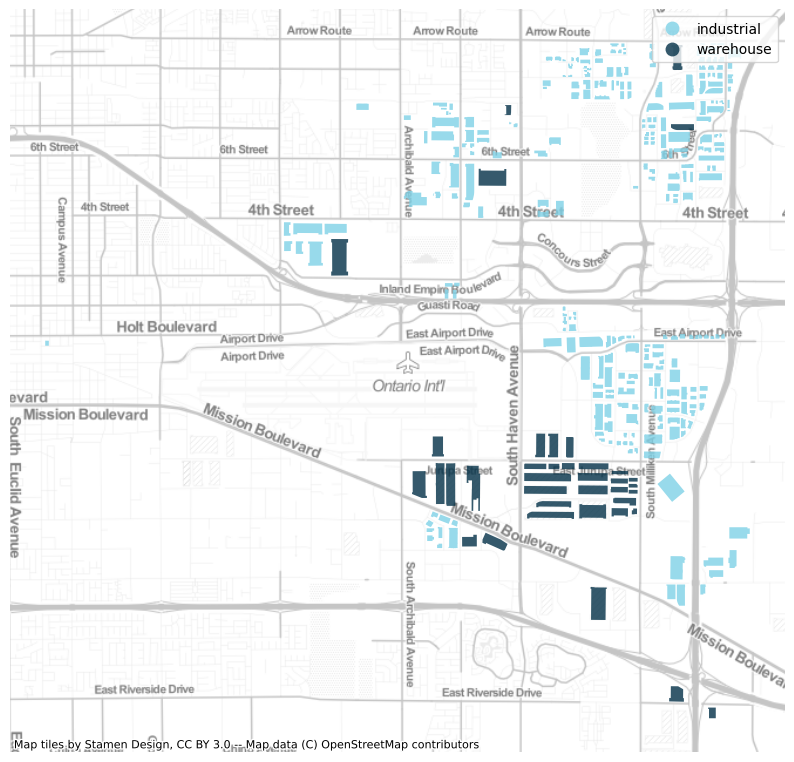

In [32]:
#adding a basemap

# Define a list of colors
colors_list = ['#7ED1E6','#023047']

# Create a colormap from the list of colors
cmap = colors.ListedColormap(colors_list)

fig,ax=mplt.subplots(figsize=(10,10))
osm_wm.plot(ax=ax,
            column='building',
            cmap=cmap,
            legend=True,
            alpha=0.8,
           )

ax.axis('off');

ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.5
               )

In the map above, we can see the buildings categorized as 'industrial' or 'warehouse'. 